In [14]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [15]:
# Load the data
file_path = '/Users/yeshwanthsatyadev/Downloads/Company_Data.csv'
company_data = pd.read_csv(file_path)

In [16]:
# Exploratory Data Analysis (EDA)
# Display summary statistics, check for missing values, etc.
print(company_data.info())
print(company_data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB
None
            Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
m

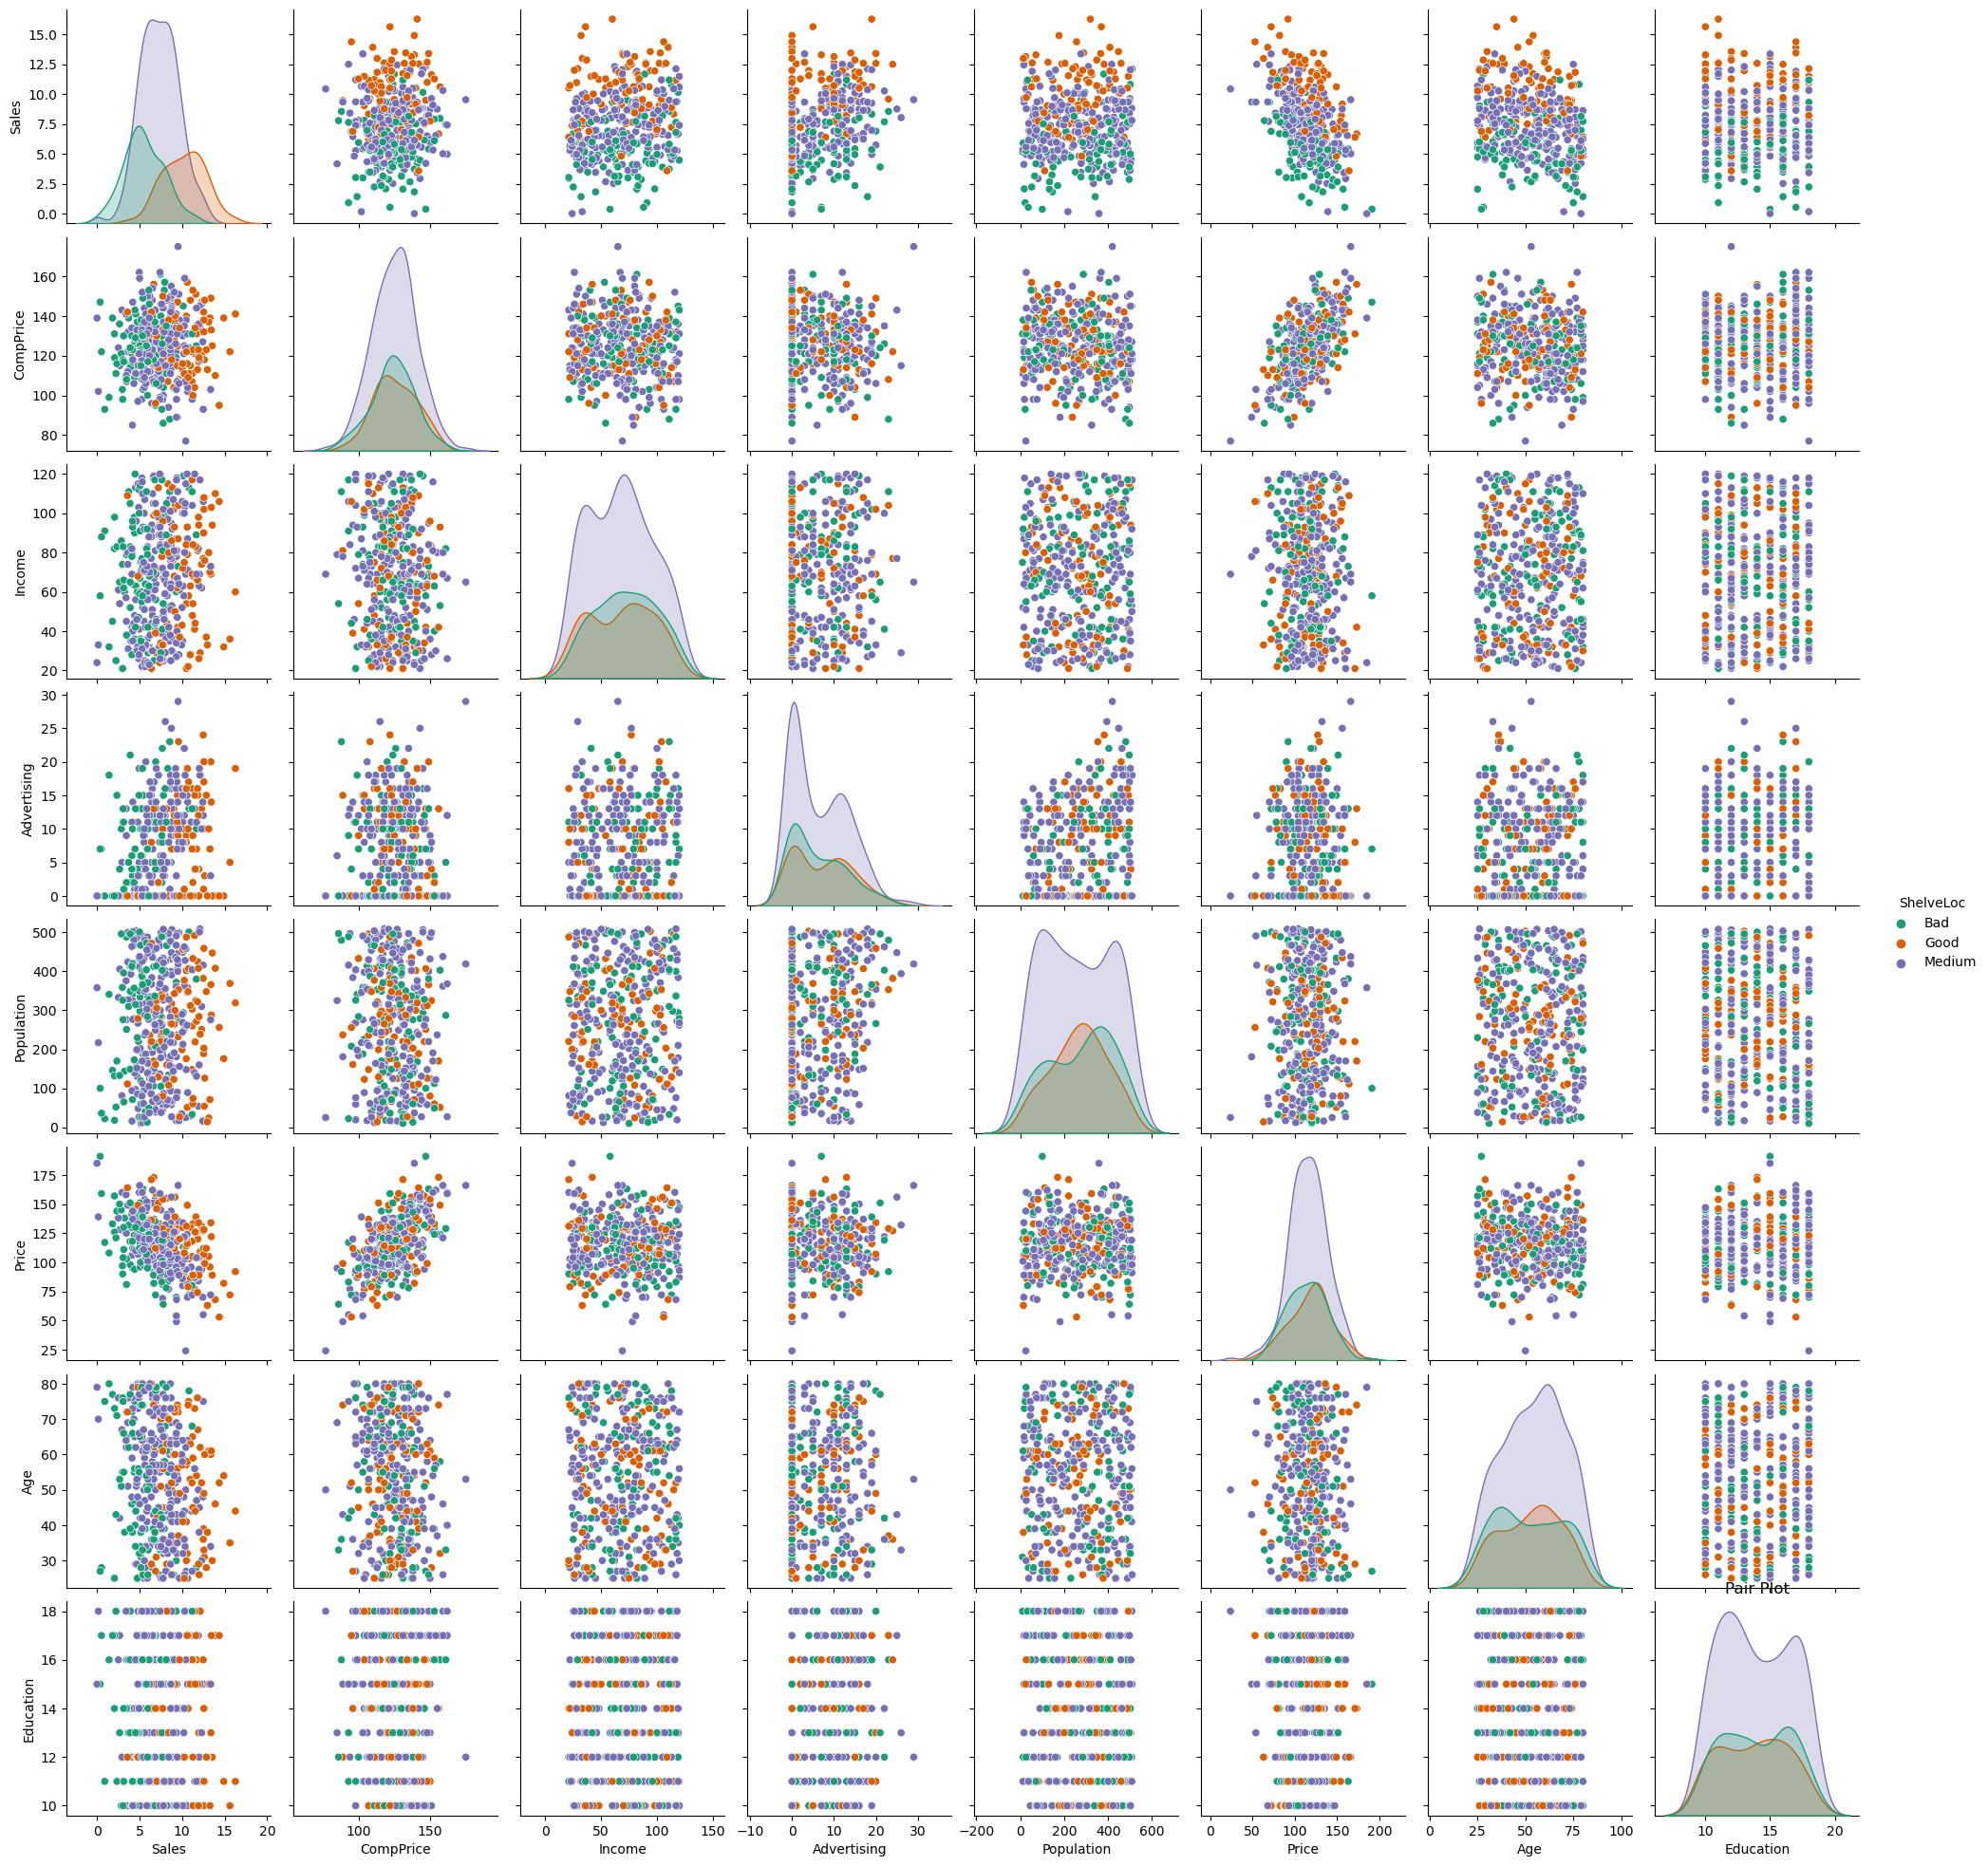

In [17]:
# Visualizations
# Pair plot for numerical variables
sns.pairplot(company_data, hue='ShelveLoc', palette='Dark2')
plt.title('Pair Plot')
plt.show()

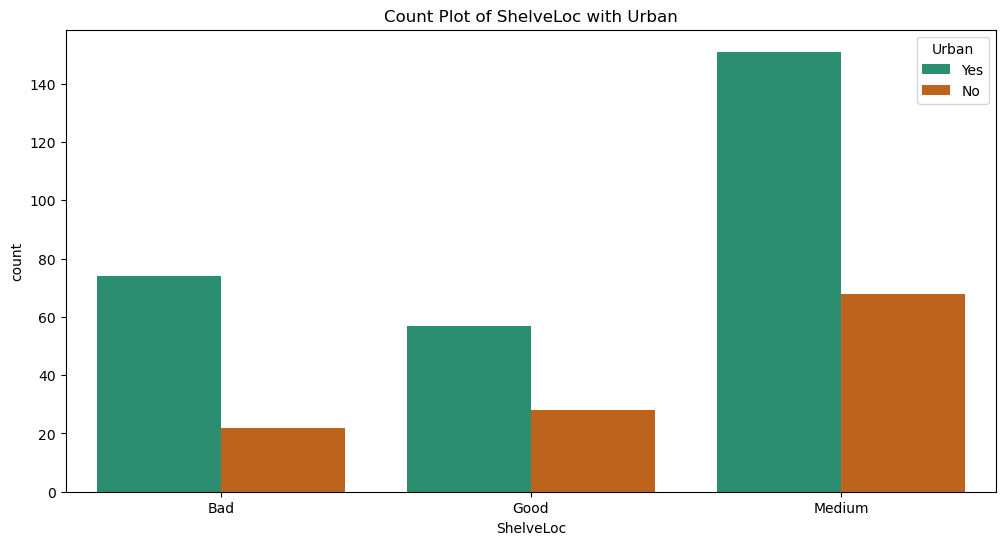

In [18]:
# Count plot for categorical variables
plt.figure(figsize=(12, 6))
sns.countplot(x='ShelveLoc', hue='Urban', data=company_data, palette='Dark2')
plt.title('Count Plot of ShelveLoc with Urban')
plt.show()

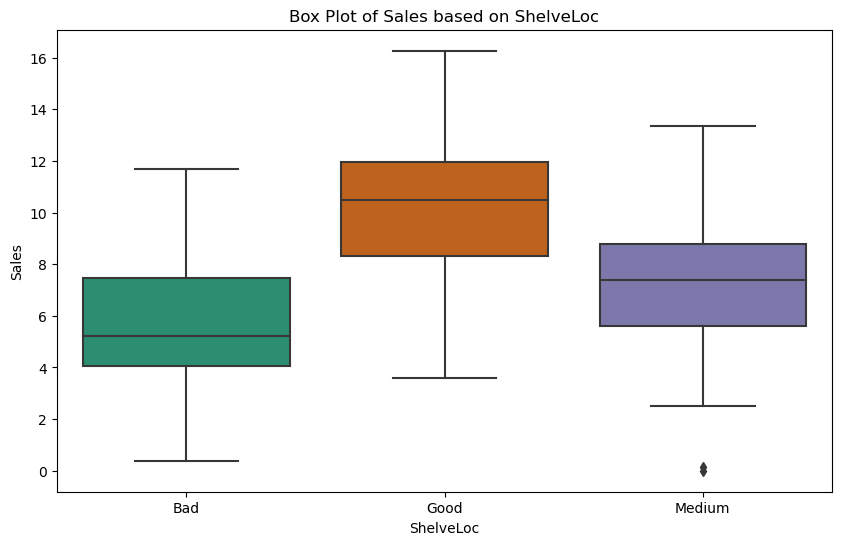

In [19]:
# Box plot for Sales based on ShelveLoc
plt.figure(figsize=(10, 6))
sns.boxplot(x='ShelveLoc', y='Sales', data=company_data, palette='Dark2')
plt.title('Box Plot of Sales based on ShelveLoc')
plt.show()


In [20]:
# Data Preprocessing
# Convert categorical variables to numerical using Label Encoding
label_encoder = LabelEncoder()
company_data['ShelveLoc'] = label_encoder.fit_transform(company_data['ShelveLoc'])
company_data['Urban'] = label_encoder.fit_transform(company_data['Urban'])
company_data['US'] = label_encoder.fit_transform(company_data['US'])

In [21]:
# Split the data into features (X) and target variable (y)
X = company_data.drop('Sales', axis=1)
y = company_data['Sales']

In [22]:
# Model Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree Model for Regression
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [25]:
# Model Evaluation
y_pred = dt_model.predict(X_test)

In [27]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate metrics for regression
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [28]:
# Display the results
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Display Decision Tree
tree_rules = export_text(dt_model, feature_names=list(X.columns))
print("Decision Tree Rules:\n", tree_rules)

Mean Squared Error: 6.385489999999999
R^2 Score: 0.35475350165055974
Decision Tree Rules:
 |--- Price <= 94.50
|   |--- ShelveLoc <= 0.50
|   |   |--- Income <= 49.00
|   |   |   |--- Age <= 50.00
|   |   |   |   |--- Education <= 16.50
|   |   |   |   |   |--- value: [7.50]
|   |   |   |   |--- Education >  16.50
|   |   |   |   |   |--- value: [6.88]
|   |   |   |--- Age >  50.00
|   |   |   |   |--- Income <= 37.00
|   |   |   |   |   |--- value: [4.42]
|   |   |   |   |--- Income >  37.00
|   |   |   |   |   |--- value: [3.47]
|   |   |--- Income >  49.00
|   |   |   |--- CompPrice <= 118.50
|   |   |   |   |--- Population <= 229.50
|   |   |   |   |   |--- value: [6.64]
|   |   |   |   |--- Population >  229.50
|   |   |   |   |   |--- Education <= 14.50
|   |   |   |   |   |   |--- Education <= 11.50
|   |   |   |   |   |   |   |--- value: [8.01]
|   |   |   |   |   |   |--- Education >  11.50
|   |   |   |   |   |   |   |--- Income <= 85.50
|   |   |   |   |   |   |   |   |--- v